<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [8]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [10]:
!gdown https://drive.google.com/uc?id=1X-1iyTv239s2hwaFAppbPpMQg_BwHiFL -O train.csv

Downloading...
From: https://drive.google.com/uc?id=1X-1iyTv239s2hwaFAppbPpMQg_BwHiFL
To: /content/train.csv
100% 664k/664k [00:00<00:00, 61.9MB/s]


In [11]:
data = pd.read_csv('/content/train.csv')

In [12]:
# посмотрим на наши данные
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# посмотрим на типы данных в таблице
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [ ]:
# мы видим что в таблице колонка "TotalSpent" имеет тип данных "object",
# но должна иметь тип данных "float".
# посмотрим на значения в этой колонке
data['TotalSpent'].value_counts()

           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: int64

In [ ]:
# переведем колонку "TotalSpent" в числовой формат и заменим пропуски нулями
data['TotalSpent'] = data['TotalSpent'].replace(' ', 0).astype(float)

In [ ]:
# посмотрим еще раз на "хвост" таблицы
data.sort_values('TotalSpent', ascending=False).tail(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3966,1,18.80,18.8,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
2543,0,19.70,0.0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
4326,0,25.35,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,0.0,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
1048,0,25.75,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3697,0,20.00,0.0,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4598,0,56.05,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
3078,0,80.85,0.0,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
4002,0,61.90,0.0,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4551,0,52.55,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0


In [ ]:
# посмотрим количество пропусков в каждом столбце
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

*во всех данных нет пропусков*

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

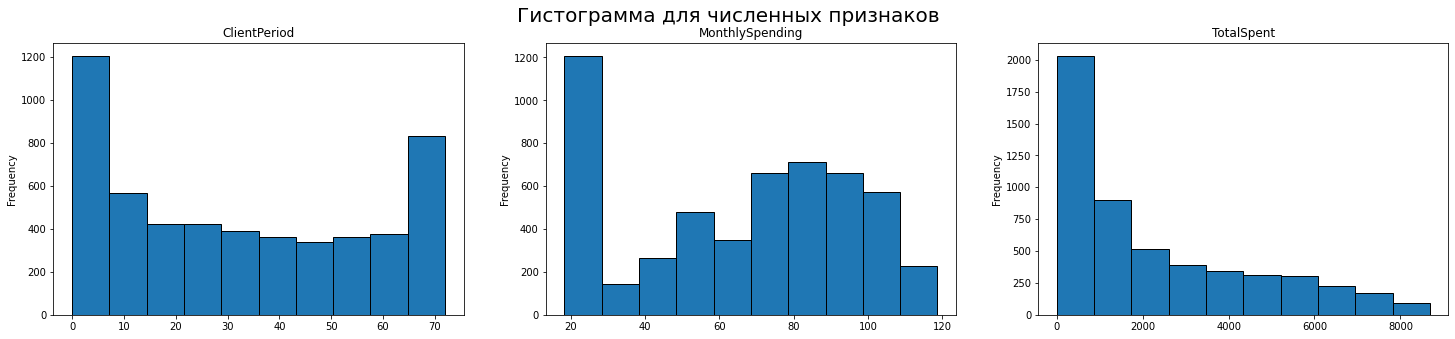

In [ ]:
# построим гистограмму для численных признаков
fig, axes = plt.subplots(ncols=3, figsize=(25, 5))
fig.suptitle('Гистограмма для численных признаков', fontsize=20)
for ax, col in zip(axes.flatten(), num_cols):
    ax.set_title(col)
    data[col].plot(kind="hist", ec="black", ax=ax)

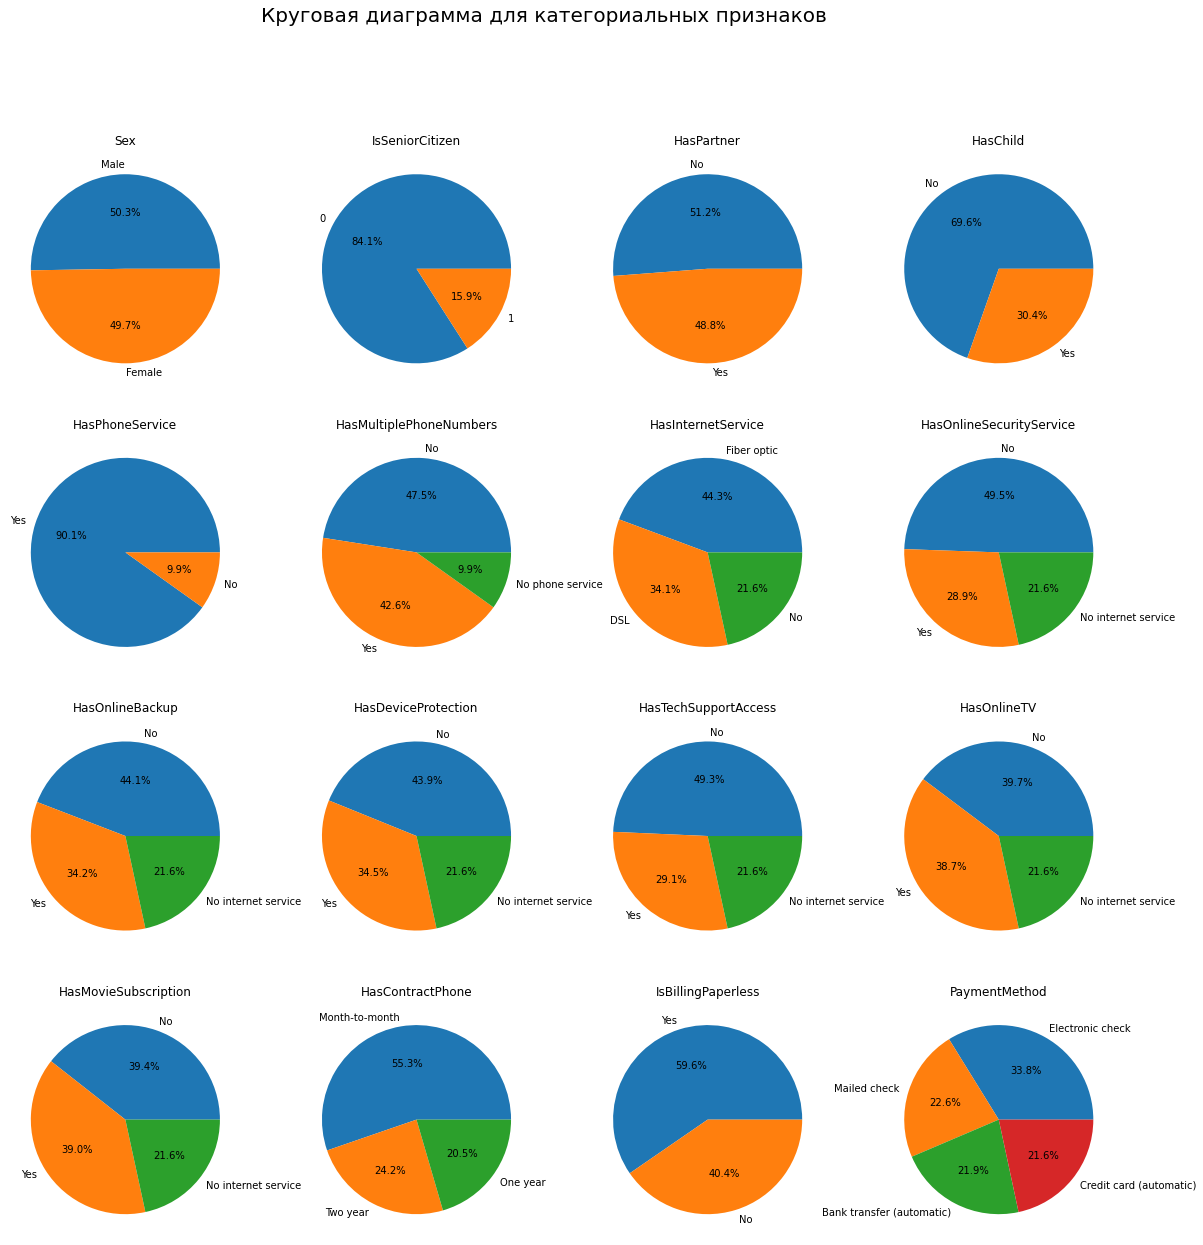

In [ ]:
# построим круговую диаграмму для категориальных признаков
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.suptitle('Круговая диаграмма для категориальных признаков', fontsize=20)
for ax, col in zip(axes.flatten(), cat_cols):
    ax.set_title(col)
    ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

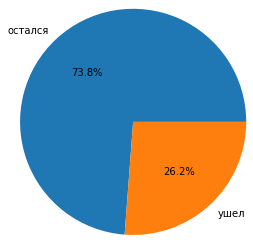

In [ ]:
# построим круговую диаграмму распределения целевой переменной
plt.pie(data[target_col].value_counts(), autopct="%1.1f%%", labels=['остался', 'ушел'], radius=1.3);

*классы в целевой переменной являются несбалансированными. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).*

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
# сохраним наш датасет для использования catboost
X_origin = data[feature_cols].copy()
y_origin = data[target_col].copy()

In [ ]:
# перейдем к предобработке данных
# категориальные изменим с помощью OneHotEncoder
cat_data = data[cat_cols]
num_data = data[num_cols]
dummy_features = pd.get_dummies(cat_data)
X = pd.concat([num_data, dummy_features], axis=1)
y = data[target_col]

In [ ]:
# разделим наш датасет
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)


In [ ]:
# нормируем числовые признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# применим логистическую регрессию

c_values = [100, 10, 1, 0.1, 0.01, 0.001]

clf = LogisticRegressionCV(Cs=c_values, cv=5, refit=True, n_jobs=-1, scoring='roc_auc')
clf.fit(X_train_scaled, y_train)

y_test_predicted = clf.predict_proba(X_test_scaled)[:, 1]

test_auc = roc_auc_score(y_test, y_test_predicted)
print(f'Лучший параметр C: {float(clf.C_)}\n'
f'Лучшее качество: {test_auc}')

Лучший параметр C: 100.0
Лучшее качество: 0.826807103739345


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
#установим и импортируем catboost
#!pip install catboost
import catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
# разделим нашу необработанную выборку
X_train, X_validation, y_train, y_validation = train_test_split(
    X_origin, y_origin, train_size=0.8, random_state=42)

In [ ]:
# найдем индексы колонок с категориальными переменными
index_of_cat_col = [data.columns.get_loc(col) for col in cat_cols]

In [ ]:
# обучим модель со стандартными параметрами
boosting_model = catboost.CatBoostClassifier()

boosting_model.fit(X_train, y_train, cat_features=index_of_cat_col, verbose=False)

In [ ]:
# проверим качество модели
y_train_predicted_base = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted_base = boosting_model.predict_proba(X_validation)[:, 1]
train_auc_base = roc_auc_score(y_train, y_train_predicted_base)
test_auc_base = roc_auc_score(y_validation, y_test_predicted_base)

print(f'Лучшее качество на тренировочной выборке: {train_auc_base}\n'
f'Лучшее качество на валидационной выборке: {test_auc_base}')

Лучшее качество на тренировочной выборке: 0.8980361281001294
Лучшее качество на валидационной выборке: 0.823387759625419


In [ ]:
# обучим модель с заданными параметрами
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.01,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1, 
    one_hot_max_size=2, 
    leaf_estimation_method='Newton' 
)
tunned_model.fit(
    X_train, y_train,
    cat_features=index_of_cat_col,
    eval_set=(X_validation, y_validation),
    verbose=False
)

In [ ]:
# попробуем увеличить число деревьев на 20 %
best_model = CatBoostClassifier(
    random_seed=42,
    iterations=int(tunned_model.tree_count_ * 1.2)
)
best_model.fit(X_origin, y_origin,
               cat_features=index_of_cat_col,
               verbose=100,
               plot=False)

Learning rate set to 0.02228
0:	learn: 0.6783081	total: 19.1ms	remaining: 17.8s
100:	learn: 0.4059940	total: 1.72s	remaining: 14.2s
200:	learn: 0.3892661	total: 3.33s	remaining: 12.2s
300:	learn: 0.3810379	total: 4.97s	remaining: 10.5s
400:	learn: 0.3738375	total: 6.69s	remaining: 8.93s
500:	learn: 0.3647297	total: 8.48s	remaining: 7.36s
600:	learn: 0.3560017	total: 10.4s	remaining: 5.78s
700:	learn: 0.3486563	total: 13s	remaining: 4.35s
800:	learn: 0.3411641	total: 14.9s	remaining: 2.51s
900:	learn: 0.3335987	total: 16.9s	remaining: 656ms
935:	learn: 0.3311952	total: 17.6s	remaining: 0us


In [ ]:
# проверим качество модели
y_train_predicted = best_model.predict_proba(X_train)[:, 1]
y_test_predicted = best_model.predict_proba(X_validation)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_validation, y_test_predicted)

print(f'Лучшее качество на тренировочной выборке: {train_auc}\n'
f'Лучшее качество на валидационной выборке: {test_auc}')

Лучшее качество на тренировочной выборке: 0.8934779369517866
Лучшее качество на валидационной выборке: 0.8724637748081381


In [ ]:
# выведем все параметры модели
for key,value in best_model.get_all_params().items():
 print(f'{key} = {value}')

nan_mode = Min
eval_metric = Logloss
combinations_ctr = ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
iterations = 936
sampling_frequency = PerTree
fold_permutation_block = 0
leaf_estimation_method = Newton
counter_calc_method = SkipTest
grow_policy = SymmetricTree
penalties_coefficient = 1
boosting_type = Plain
model_shrink_mode = Constant
feature_border_type = GreedyLogSum
ctr_leaf_count_limit = 18446744073709551615
bayesian_matrix_reg = 0.10000000149011612
one_hot_max_size = 2
eval_fraction = 0
force_unit_auto_pair_weights = False
l2_leaf_reg = 3
random_strength = 1
rsm = 1
boost_from_average = False
max_ctr_complexity = 4
model_size_reg = 0.5
simple_ctr = ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prio

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [ ]:
best_model.predict_proba(X_test)

array([[0.98433044, 0.01566956],
       [0.28906669, 0.71093331],
       [0.42192612, 0.57807388],
       ...,
       [0.17575068, 0.82424932],
       [0.55766704, 0.44233296],
       [0.99327832, 0.00672168]])

In [ ]:
y_predict = best_model.predict_proba(X_test)[:,1] 
submission['Churn'] = y_predict
submission.to_csv('submission.csv', index=False)

Ник на kaggle: Ilya Terkin

Ник на stepik: Илья Федотов

Лучший результат kaggle: 0.85218

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.